### Etan Ogbemi

## Context:
Can you differentiate a weed from a crop seedling?
The ability to do so effectively can mean better crop yields and better stewardship of the environment.
The Aarhus University Signal Processing group, in collaboration with University of Southern Denmark, has
recently released a dataset containing images of unique plants belonging to 12 species at several growth stages

### Objective:

To implement the techniques learnt as a part of the course.

### Learning Outcomes:

* Pre-processing of image data.
* Visualization of images.
* Building CNN.
* Evaluate the Model.
* The objective of the project is to make the learners capable of handling images/image classification problems, during this process you should also be capable of handling real image files, not just limited to a numpy array of image pixels.

### Guide to solve the project seamlessly:

Here are the points which will help you to solve the problem efficiently:

* Read the problem statement carefully from start to end (including the note at the end).

The highlighted part in the attached problem statement should not be missed.

* Download the dataset from the Olympus platform.
* Upload the "images.npy" and “Labels.csv” file to google drive.
* Then you can use the dataset path in the Google Colab notebook to do further steps related to project problem statement.
* You can set runtime type to “GPU” in Google Colab, so that the code will run faster as you will be using CNN to fit your model.

### Note:

Download the images.npy file from the Olympus Platform.
Do not download the dataset from Kaggle, as:

* The dataset is big.
* The dataset has 2 files for train and test images, but the labels are only for the train file. Test file has no labels associated with it. So, when you want to know the accuracy of model on test images, there’s no way to measure it. That’s why the data provided to you on Olympus has only train images converted into numpy array and their labels in the csv file. For our purpose we use this for our training and testing and validation purpose.

## Data Description:


You are provided with a dataset  of  images of  plant seedlings at various stages of  growth.  Each image has a filename that is its unique  id.  The  dataset  comprises  12  plant  species.  The  goal  of  the  project  is  to  create  a  classifier  capable  of  determining  a plant's species from a photo.

### Dataset

The dataset can be download from Olympus.The data file names are:

* images.npy
* Label.csv

The original files are from Kaggle. Due to the large volume of data, the images were converted to images.npy file and the labels are  also  put  into  the  Labels.csv.  So  that  you  can  work  on  the  data/project  seamlessly  without  worrying  about  the  high  data volume.The following code was used to convert the large dataset of images to numpy array

In [1]:
# Import the necessary libraries
import cv2
#Reading the training images from the path and labelling them into the given categories
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 # this is an important module to get imported which may even cause issues while reading the data if not used
import os
import seaborn as sns # for data visualization 
import tensorflow as tf
import keras
import os
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential #sequential api for sequential model 
from tensorflow.keras.layers import Dense, Dropout, Flatten #importing different layers 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU,Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical #to perform one-hot encoding 
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam #optimiers for optimizing the model
from tensorflow.keras.callbacks import EarlyStopping  #regularization method to prevent the overfitting
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import losses, optimizers
# from cv2 import cv2_imshow
# from google.colab.patches import cv2_imshow
from PIL import Image
from tensorflow.keras.preprocessing import image

In [2]:
# confirm that we can connect to the GPU with tensorflow:
# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU device not found')
# print('Found GPU at: {}'.format(device_name))

In [3]:
# Load the image classes (categories) and the images them selves 
# which are in a numpy array
numpy_data = np.load("G:\My Drive\Colab_Notebooks\Plants_seedling_classification_project/images.npy")
labels = pd.read_csv("G:\My Drive\Colab_Notebooks\Plants_seedling_classification_project/Labels.csv")

In [4]:
# view the shape of the data
numpy_data.shape

(4750, 128, 128, 3)

In [5]:
# View the array
numpy_data

array([[[[ 35,  52,  78],
         [ 36,  49,  76],
         [ 31,  45,  69],
         ...,
         [ 78,  95, 114],
         [ 76,  93, 110],
         [ 80,  95, 109]],

        [[ 33,  46,  68],
         [ 37,  50,  73],
         [ 48,  65,  83],
         ...,
         [ 81,  96, 113],
         [ 74,  89, 105],
         [ 83,  95, 109]],

        [[ 34,  50,  68],
         [ 35,  52,  72],
         [ 70,  85, 101],
         ...,
         [ 83,  97, 112],
         [ 79,  94, 108],
         [ 79,  94, 107]],

        ...,

        [[ 35,  50,  69],
         [ 42,  57,  73],
         [ 42,  57,  72],
         ...,
         [ 60,  76,  92],
         [ 67,  81,  97],
         [ 64,  77,  95]],

        [[ 36,  52,  67],
         [ 48,  63,  78],
         [ 41,  57,  73],
         ...,
         [ 44,  66,  83],
         [ 58,  76,  91],
         [ 57,  74,  90]],

        [[ 44,  58,  70],
         [ 43,  57,  73],
         [ 40,  55,  72],
         ...,
         [ 41,  70,  92],
        

In [6]:
print(type(numpy_data))

<class 'numpy.ndarray'>


In [7]:
# To view the categories and confirm there are indeed 12 of them and view the frequency of each category
for col in labels.columns:
    print(labels[col].value_counts()) # how many images in each category

Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Maize                        221
Common wheat                 221
Name: Label, dtype: int64


In [8]:
# View the dataframe
labels # labels is a dataframe

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill
...,...
4745,Loose Silky-bent
4746,Loose Silky-bent
4747,Loose Silky-bent
4748,Loose Silky-bent


In [9]:
# The frequency of the classes by percentage
labels[col].value_counts(normalize=True)*100

Loose Silky-bent             13.768421
Common Chickweed             12.863158
Scentless Mayweed            10.863158
Small-flowered Cranesbill    10.442105
Fat Hen                      10.000000
Charlock                      8.210526
Sugar beet                    8.105263
Cleavers                      6.042105
Black-grass                   5.536842
Shepherds Purse               4.863158
Maize                         4.652632
Common wheat                  4.652632
Name: Label, dtype: float64

### Observation

The dataset is not balanced, however the most severe unbalance is a ratio of about 3:1, majority to minority class, so we will not use undersample or oversample techniques as the dataset appears robust enough.  The bias due to the dominant classes numbers should not overly affect the model's predictiveness as there is sufficient data in the minoirity classes to provide good modelling.

In [10]:
# Create an array of the 12 categories which will be used for classification at the output layer
# of the CNN.  We may consider converting the array into a tuple as tuples process faster but for now we won't
# cat_labels = labels[Label].unique()
cat_labels = labels[col].unique() #changes type from dataframe to numpy array
# array_tuple = tuple([tuple(e) for e in cat_labels])
# print(array_tuple)

In [11]:
# Checking the data type is an array
print(type(cat_labels))

<class 'numpy.ndarray'>


In [12]:
print(type(labels))

<class 'pandas.core.frame.DataFrame'>


In [13]:
cat_labels

array(['Small-flowered Cranesbill', 'Fat Hen', 'Shepherds Purse',
       'Common wheat', 'Common Chickweed', 'Charlock', 'Cleavers',
       'Scentless Mayweed', 'Sugar beet', 'Maize', 'Black-grass',
       'Loose Silky-bent'], dtype=object)

In [14]:
cat_labels.shape

(12,)

In [15]:
# Change spaces in the elements in labels to underscore
converter = lambda x: x.replace(' ', '_')
labels_nospace = list(map(converter, labels))
labels_nospace

['Label']

In [16]:
print(type(labels_nospace))

<class 'list'>


In [17]:
for x in range(len(labels_nospace)):
    print (labels_nospace[x]),

Label


In [18]:
# labels_nospace[col].value_counts(normalize=True)*100

In [19]:
labels

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill
...,...
4745,Loose Silky-bent
4746,Loose Silky-bent
4747,Loose Silky-bent
4748,Loose Silky-bent


In [20]:
X_train, X_test, y_train, y_test = train_test_split(numpy_data, labels, test_size=0.1, random_state=1,stratify=labels)

In [21]:
X_train.shape

(4275, 128, 128, 3)

In [22]:
X_train

array([[[[ 61,  78,  95],
         [ 61,  78,  95],
         [ 60,  77,  94],
         ...,
         [ 17,  43,  83],
         [ 19,  44,  83],
         [ 20,  44,  83]],

        [[ 61,  78,  94],
         [ 61,  78,  94],
         [ 60,  77,  93],
         ...,
         [ 17,  44,  83],
         [ 19,  44,  83],
         [ 20,  44,  83]],

        [[ 61,  78,  94],
         [ 60,  78,  93],
         [ 58,  76,  91],
         ...,
         [ 17,  44,  84],
         [ 19,  44,  84],
         [ 19,  44,  84]],

        ...,

        [[ 44,  61,  80],
         [ 44,  61,  80],
         [ 44,  61,  80],
         ...,
         [ 47,  60,  69],
         [ 46,  59,  68],
         [ 45,  58,  68]],

        [[ 46,  64,  82],
         [ 46,  64,  82],
         [ 46,  63,  82],
         ...,
         [ 47,  60,  69],
         [ 46,  59,  68],
         [ 45,  58,  68]],

        [[ 47,  65,  83],
         [ 47,  65,  83],
         [ 46,  64,  82],
         ...,
         [ 47,  60,  69],
        

In [23]:
y_train.shape

(4275, 1)

In [24]:
y_train

,Label
938,Fat Hen
1827,Common Chickweed
2083,Charlock
229,Small-flowered Cranesbill
1288,Common wheat
...,...
612,Fat Hen
471,Small-flowered Cranesbill
3917,Black-grass
994,Shepherds Purse


In [25]:
print(type(labels))

<class 'pandas.core.frame.DataFrame'>


In [26]:
labels.shape

(4750, 1)

In [27]:
value1 = labels.at[484,'Label']
print(value1)

Small-flowered Cranesbill


In [28]:
cat_labels.shape

(12,)

In [29]:
# Check the shape of the images data array
tf.shape(numpy_data)

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([4750,  128,  128,    3])>

In [30]:
numpy_data.shape

(4750, 128, 128, 3)

### Observation

#### We notice that there are 4,750 images, with with image sizes of 128 X 128 pixels with three channels. Printing the image confirms that they are colour images and of RGB type.  We will therefore convert the images to grayscale and the shape should now have only 1 channel as it will now be in grayscale.We will also not resize the images as they are all of the same resolution.  Decreasing the size may result in loss of information and increasing the size might introduce padded information which will increase processing time and give the model extra work to figure out which pixels are irrelevnt

In [31]:
# Check the shape of cat_labels)
cat_labels.shape

(12,)

In [32]:
labels.shape

(4750, 1)

### Observation
#### We can confirm that the number of rows of the labels matches that of the images.

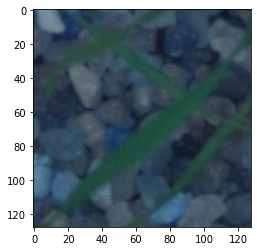

In [33]:
# Plot one of the images #276
plt.imshow(numpy_data[4200])

In [34]:
# Image_converted = cv2.cvtColor(numpy_data, cv2.COLOR_BGR2RGB)

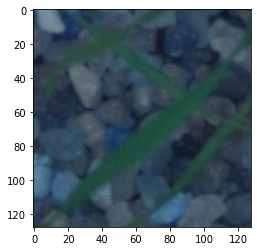

In [35]:
plt.imshow(numpy_data[4200])

In [36]:
# cv2_imshow(numpy_data[276])

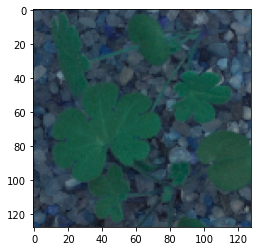

In [37]:
plt.imshow(numpy_data[276])

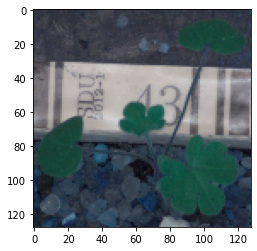

In [38]:
# print("Label: {}".format(labels[11]))
plt.imshow(numpy_data[11], cmap='gray')

## Observation

#### It is useful to note that the numpy loads images as RGB while OpenCV loads images as BGR.  For our purposes we are using OpenCV to manipulate the images and they provide the "real" colours of the images as can be seen from the images above and below

In [39]:
# Loop through and convert all the images in the array from RGB to Gray
# and put them into a new array called gray_images
gray_images = np.zeros(numpy_data.shape[:-1])
for i in range(numpy_data.shape[0]): 
    gray_images[i] = cv2.cvtColor(numpy_data[i], cv2.COLOR_BGR2GRAY)
tf.shape(gray_images)

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([4750,  128,  128])>

### Observation

### We note that the array now has only one channel after converting from colour to grayscale, we also note that the datatype is still integer and we will deal with this later

In [40]:
# Checking randomn images to confirm conversion to grayscale
cv2_imshow(gray_images[4042])
cv2_imshow(numpy_data[4042])
cv2_imshow(gray_images[276])
cv2_imshow(numpy_data[276])

NameError: name 'cv2_imshow' is not defined

In [ ]:
gray_images.shape

In [ ]:
# Sequential model in tensorflow.keras expects data to be in the format (num, height, width, channels)
# where, num = number of examples, height = height of image, width = width of image, channels = number of channels
# we will therefore explicitly show the channel
gray_images = gray_images.reshape(gray_images.shape[0], 128, 128, 1)

In [ ]:
gray_images.shape

### We can now append the labels to the array

In [ ]:
d[y_train['Label'][i]].append(img)

In [ ]:
#  First we convert the numpy array to a dataframe
# gray_images_df = pd.DataFrame(gray_images)
# np.hstack((gray_images,labels))

In [ ]:
dataframe.insert(2, 'Places', places)

### Observation

#### In order to take advantage of GPU processing, we will need to convert the numpy array, gray_images, into a tensor since GPU processing does not support numpy arrays

In [ ]:
# We will convert the numpy array to a tensor
# We will also ensure that the integers are now stored as floats as discussed earlier
# as we will need to normalise later
tensor1 = tf.convert_to_tensor(gray_images, dtype=float)
tensor1.shape

In [ ]:
# We will also confirm that the tensor data type is float
tensor1.dtype

### Normalize data
#### we must normalize our data as it is always required in neural network models we can achieve this by dividing the RGB codes with 255 (which is the maximum RGB code minus the minimum RGB code) normalize X_train and X_test make sure that the values are float so that we can get decimal points after division

In [ ]:
tensor1 /= 255

In [ ]:
tensor1

In [ ]:
# Checking the shape, number of images and the maximum value of the variables
print("The shape of tensor 1 is:", tensor1.shape)
print("The number of images in tensor1 is:", tensor1.shape[0])
# print("The maximum size of the variables in tensor1 is:", tensor1.max())

In [ ]:
# Check the number of elements in the original numpy_array
tf.size(numpy_data).numpy()

In [ ]:
# Check the number of elements in the tensor
tf.size(tensor1).numpy()

### Observation

#### We notice that the number of elements in the tensor1, with 1 dimension, is exactly 1/3 the number of elements in original numpy_data which had 3 dimensions

In [ ]:
# Converting the list into DataFrame
y_train = pd.DataFrame(y_train, columns=["Label"],dtype=object) 
# y_test = pd.DataFrame(y_test, columns=["Label"],dtype=object)

In [ ]:
# Creating two different lists to store the Numpy arrays and the corresponding labels
X_train = []                                                                   
y_train = []
np.random.shuffle(gray_images)                                               # Shuffling data to reduce variance and making sure that model remains general and overfit less
for features,label in gray_images:                                           # Iterating over the training data which is generated from the create_training_data() function 
    X_train.append(features)                                                   # Appending images into X_train
    y_train.append(label)                                                      # Appending labels into y_train

In [ ]:
# Converting the pixel values into Numpy array
X_train= np.array(X_train) 
X_test= np.array(X_test) 

In [ ]:
# Setting up parameters for batch size and image size
batch_size = 32
img_height = 128
img_width = 128

In [ ]:
# initialized a sequential model
model_2 = Sequential()

# adding first conv layer with 256 filters and kernel size 5x5 , with ReLU activation and padding 'same' provides the output size same as the input size
#input_shape denotes input image dimension of images
model_2.add(Conv2D(filters = 256, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (150,150,1)))  # Shape of the image given to the model

# adding max pooling to reduce the size of output of first conv layer
model_2.add(MaxPool2D(pool_size=(2,2)))
#  adding dropout to randomly switch off 25% neurons to reduce overfitting
model_2.add(Dropout(0.25))

#  adding second conv layer with 128 filters and with kernel size 3x3 and ReLu activation function
model_2.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
# adding max pooling havinf pool_size and strides with (2,2) to reduce the size of output of second conv layer
model_2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
#  adding dropout to randomly switch off 25% neurons to reduce overfitting
model_2.add(Dropout(0.25))

#  adding third conv layer with 128 filters and with kernel size 3x3 and ReLu activation function
model_2.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
# adding max pooling havinf pool_size and strides with (2,2) to reduce the size of output of third conv layer
model_2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
#  adding dropout to randomly switch off 30% neurons to reduce overfitting
model_2.add(Dropout(0.3))

# adding fourth conv layer with 128 filters and with kernel size 2x2 and ReLu activation function
model_2.add(Conv2D(filters = 128, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
# adding max pooling havinf pool_size and strides with (2,2) to reduce the size of output of fourth conv layer
model_2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
#  adding dropout to randomly switch off 30% neurons to reduce overfitting
model_2.add(Dropout(0.3))

# adding fifth conv layer with 128 filters and with kernel size 2x2 and ReLu activation function
model_2.add(Conv2D(filters = 128, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
# adding max pooling havinf pool_size and strides with (2,2) to reduce the size of output of fifth conv layer
model_2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
#  adding dropout to randomly switch off 30% neurons to reduce overfitting
model_2.add(Dropout(0.3))

# flattening the 3-d output of the conv layer after max pooling to make it ready for creating dense connections
model_2.add(Flatten())
# adding a fully connected dense layer with 1024 neurons 
model_2.add(Dense(1024, activation = "relu"))
#  adding dropout to randomly switch off 50% neurons to reduce overfitting
model_2.add(Dropout(0.5))
# adding the output layer with 4 neurons and activation functions as softmax since this is a multi-class classification problem.
model_2.add(Dense(12, activation = "softmax"))

In [ ]:
model_2.summary()

In [ ]:
# Taking Adam as an optimizer with learning rate 0.001
optimizer = Adam(lr=0.001)
# Compiling the model with Adam as optimizer, categorical_crossentropy as loss function and accuracy as metrics
model_2.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# Fitting the model with 30 epochs and validation_split as 20%
history=model_2.fit(X_train, 
          y_train_e,  
          epochs=30, 
          batch_size=64,validation_split=0.20,callbacks=[es, mc])  

In [ ]:
# Splitting the data into training and testing
# X_train, X_test, y_train, y_test = train_test_split(numpy_data,labels , test_size=0.1, random_state=1,stratify=labels)